In [12]:
import alara_output_processing as aop
import matplotlib.pyplot as plt

In [13]:
fp = '/filespace/a/asrajendra/research/activationDB/iter'
pulse_list = [2, 4, 8, 32, 64]
duty_cycles = [100, 90, 50, 25]

In [14]:
runs_100 = {
    "run1_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_2p_out",
    "run2_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_4p_out",
    "run3_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_8p_out",
    "run4_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_32p_out",
    "run5_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_64p_out",
}

runs_90 = {
    "run1_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_2p_90_out",
    "run2_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_4p_90_out",
    "run3_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_8p_90_out",
    "run4_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_32p_90_out",
    "run5_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_64p_90_out",
}

runs_50 = {
    "run1_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_2p_50_out",
    "run2_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_4p_50_out",
    "run3_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_8p_50_out",
    "run4_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_32p_50_out",
    "run5_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_64p_50_out",
}

runs_25 = {
    "run1_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_2p_25_out",
    "run2_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_4p_25_out",
    "run3_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_8p_25_out",
    "run4_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_32p_25_out",
    "run5_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_64p_25_out",
}
runs_list = [runs_100, runs_90, runs_50, runs_25]

In [ ]:
datasets = []
for runs in runs_list:
    lib = aop.DataLibrary()
    adf = aop.DataLibrary.make_entries(lib, runs)
    #Be = Zone 1
    filtered_adf = adf.filter_rows(
        filter_dict={
            "variable" : adf.VARIABLE_ENUM["Number Density"]
            #"nuclide"  : "w-185m",
            #"block" : adf.BLOCK_ENUM["Zone"],
            #"block_num" : "2"
        }
    )
    values = []
    for value in filtered_adf['value']:
        values.append(value)
    datasets.append((pulse_list, values))

/filespace/a/asrajendra/anaconda3/envs/openmc-env-dagmc/lib/python3.13/site-packages/alara_output_processing/alara_output_processing.py:394: UserWarning: Excessive filtering. No matching rows for given filters.
  warn('Excessive filtering. No matching rows for given filters.')


In [ ]:
print(list(filtered_adf['variable'].keys()))
print(filtered_adf['variable'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

ValueError: x and y must be the same size

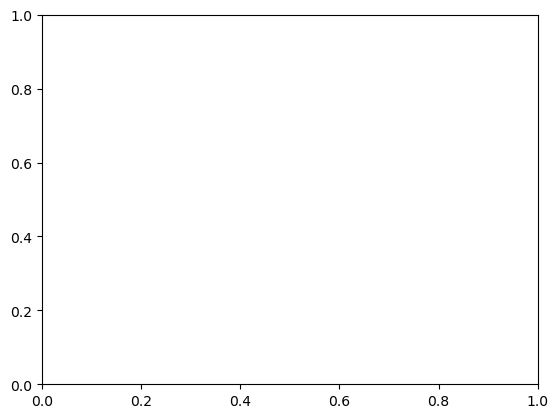

In [17]:
for i, (pulse_list, num_dens) in enumerate(datasets):
    plt.scatter(pulse_list, num_dens, label=f'{duty_cycles[i]}', s=10)

plt.xlabel('# Pulses')
plt.ylabel('Specific Activity')
plt.yscale('log')
plt.ylim(top=2E+23)
#plt.title('')
plt.legend()
plt.show()
plt.savefig('ITER_DT.png')